In [6]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [9]:
data = pd.read_csv('data/btc_data.csv', index_col=0)

In [10]:
data

,high,low,open,volumefrom,volumeto,close,market_cap,progression daily,progression tomorrow,target,ema_26,ema_12,macd,rsi,relative_volume,obv,atr,difficulty
2011-01-01,0.3000,0.292,0.3000,2821.24,8.419500e+02,0.3000,NaN,0.000000,0.000000,0,0.263021,0.274296,0.011275,75.041736,0.433468,5.708910e+03,0.018136,NaN
2011-01-02,0.3000,0.289,0.3000,5352.11,1.584660e+03,0.3000,NaN,0.000000,0.000000,0,0.265761,0.278251,0.012490,74.831650,0.784203,4.124250e+03,0.018214,NaN
2011-01-03,0.3000,0.290,0.3000,1425.19,4.208500e+02,0.2950,NaN,0.000000,-0.016667,0,0.268297,0.281597,0.013300,75.402884,0.227126,3.703400e+03,0.016429,NaN
2011-01-04,0.2999,0.289,0.2950,1879.00,5.483300e+02,0.2989,NaN,-0.016667,0.013220,1,0.270275,0.283659,0.013384,64.583333,0.317246,3.155070e+03,0.015286,NaN
2011-01-05,0.2990,0.290,0.2989,357.16,1.061900e+02,0.2990,NaN,0.013220,0.000335,1,0.272395,0.286004,0.013608,90.397805,0.063656,3.261260e+03,0.014000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13,27110.9100,26674.970,26756.2300,18507.04,4.967794e+08,26862.9000,5.216077e+11,-0.004279,0.003987,1,27129.215560,27294.402418,165.186858,46.835697,0.904417,1.270529e+10,785.304286,5.732151e+13
2023-10-14,26982.7800,26810.020,26862.9000,5865.21,1.576854e+08,26854.5200,5.236556e+11,0.003987,-0.000312,0,27109.488482,27228.017431,118.528949,49.455572,0.288510,1.286298e+10,786.607857,5.732151e+13
2023-10-15,27297.2600,26813.060,26854.5200,10978.68,2.971100e+08,27177.4100,5.239792e+11,-0.000312,0.012024,1,27090.601927,27170.556287,79.954360,48.700891,0.555745,1.256587e+10,738.972857,5.732151e+13
2023-10-16,30009.1500,27131.480,27177.4100,66720.48,1.884463e+09,28518.3700,5.296435e+11,0.012024,0.049341,1,27097.032155,27171.610705,74.578550,38.382575,3.228924,1.445033e+10,848.527857,5.732151e+13


In [8]:
data['price'].describe()

count     3822.000000
mean     12248.383008
std      15579.982642
min         67.809000
25%        573.637225
50%       6482.635680
75%      19266.162870
max      67617.015545
Name: price, dtype: float64

In [37]:
# Sélectionner les caractéristiques et exclure la dernière ligne
features = data.drop(columns=['progression tomorrow', 'target', 'price']).iloc[:-1, :]
target = data['target'].iloc[:-1]

In [27]:
# Définir la taille de la fenêtre initiale
window_size = 1000

In [13]:
#Test avec RandomForest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

"""  
# Initialiser les listes pour stocker les prédictions et les vraies valeurs
predictions = []
actuals = []

# Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
for i in range(window_size, len(data) - 1):
    # Diviser les données en ensembles d'entraînement et de test
    X_train = features.iloc[i-window_size:i, :]
    y_train = target.iloc[i-window_size:i]
    X_test = features.iloc[i:i+1, :]
    y_test = target.iloc[i]

    #Normaliser les données
    scaler = StandardScaler()
    X_train_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Entraîner un modèle
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Faire une prédiction
    prediction = model.predict(X_test)[0]
    
    # Stocker les prédictions et les vraies valeurs
    predictions.append(prediction)
    actuals.append(y_test)

# Évaluer le modèle
accuracy = accuracy_score(actuals, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')"""


Model Accuracy: 47.68%


In [32]:
def train_model(data, model, features, target, window_size):
      
      # Initialiser les listes pour stocker les prédictions et les vraies valeurs
      predictions = []
      actuals = []

      # Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
      for i in range(window_size, len(data) - 1):
            # Diviser les données en ensembles d'entraînement et de test
            X_train = features.iloc[i-window_size:i, :]
            y_train = target.iloc[i-window_size:i]
            X_test = features.iloc[i:i+1, :]
            y_test = target.iloc[i]

            #Normaliser les données
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            # Entraîner un modèle
            model.fit(X_train, y_train)
            
            # Faire une prédiction
            prediction = model.predict(X_test)[0]
            
            # Stocker les prédictions et les vraies valeurs
            predictions.append(prediction)
            actuals.append(y_test)

      # Évaluer le modèle
      accuracy = accuracy_score(actuals, predictions)
      print(f'Model Accuracy: {accuracy * 100:.2f}%')

In [33]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent")
train_model(data, dummy_model, features, target, window_size)

Model Accuracy: 53.56%


In [38]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
train_model(data, logistic_regression, features, target, window_size)

Model Accuracy: 52.64%


In [35]:
def plot_feature_importance(model, feature_names):
    # Récupérer les coefficients du modèle
    coefficients = model.coef_[0]
    
    # Créer un DataFrame pour stocker les caractéristiques et leurs importances
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefficients
    })
    
    # Trier le DataFrame en fonction de l'importance
    feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False)
    
    # Visualiser l'importance des caractéristiques
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Logistic Regression')
    plt.gca().invert_yaxis()  # Pour afficher la caractéristique la plus importante en haut
    plt.show()

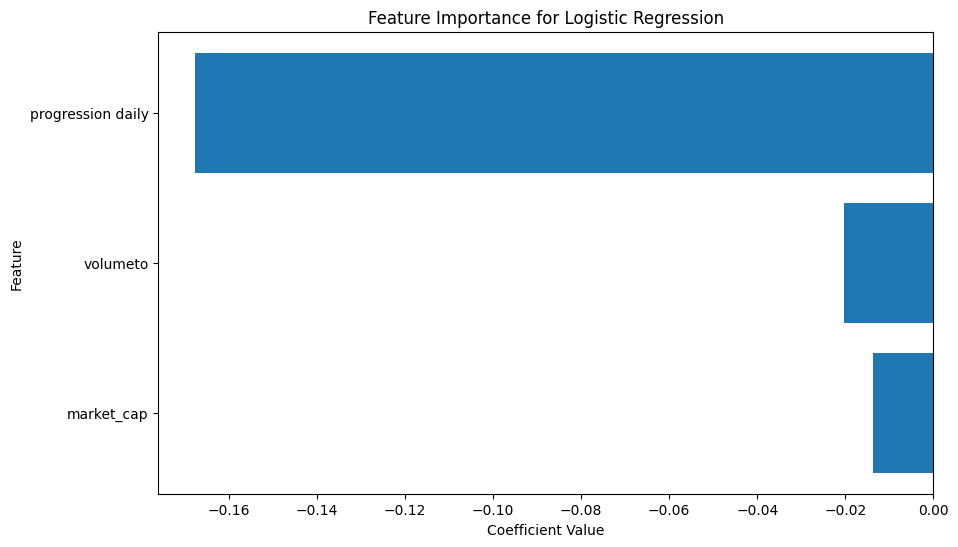

In [39]:
plot_feature_importance(logistic_regression, features.columns)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Initialiser les listes pour stocker les prédictions, les probabilités de prédiction et les vraies valeurs
predictions = []
prediction_probs = []
actuals = []

# Supposons que window_size et data sont définis
window_size = 100  # exemple de taille de fenêtre

# Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
for i in range(window_size, len(data) - 1):
    # Diviser les données en ensembles d'entraînement et de test
    X_train = features.iloc[i-window_size:i, :]
    y_train = target.iloc[i-window_size:i]
    X_test = features.iloc[i:i+1, :]
    y_test = target.iloc[i]

    """#Normaliser les données
    scaler = StandardScaler()
    X_train_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)"""

    # Entraîner un modèle
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Faire une prédiction
    prediction = model.predict(X_test)[0]
    prediction_prob = model.predict_proba(X_test)[0][1]  # probabilité de la classe 1
    
    # Stocker les prédictions, les probabilités de prédiction et les vraies valeurs
    predictions.append(prediction)
    prediction_probs.append(prediction_prob)
    actuals.append(y_test)

# Évaluer le modèle
accuracy = accuracy_score(actuals, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Matrice de coût
cost_matrix = np.array([[0, 1],  # coût de classer 0 comme 0/1
                        [5, 0]])  # coût de classer 1 comme 0/1

# Matrice de confusion
conf_matrix = confusion_matrix(actuals, predictions)

# Coût total de mauvaise classification
total_cost = np.sum(conf_matrix * cost_matrix)
print(f'Total Cost of Misclassification: {total_cost}')

Model Accuracy: 52.62%
Total Cost of Misclassification: 5027
